In [1]:
from qiskit import QuantumCircuit

# Creamos un circuito cuántico con un qubit
qc = QuantumCircuit(1)

# Definimos el estado inicial del qubit como |1>
initial_state = [0, 1]

# Aplicamos la operación de inicialización de qubit en la posición 0
qc.initialize(initial_state, 0)

Preparamos el simulador backend

In [2]:
from qiskit import execute, Aer

# Le indicamos a Qiskit cómo simular nuestro circuito
# Aer es un paquete con varios tipos de backend. Uno muy común es el statevector_simulator
backend = Aer.get_backend('statevector_simulator')

# Realizamos la simulación y retornamos el resultado
# El resultado de la execución es un objeto job (en nuestro caso se llama result)
result = execute(qc, backend).result()

Medida del qubit

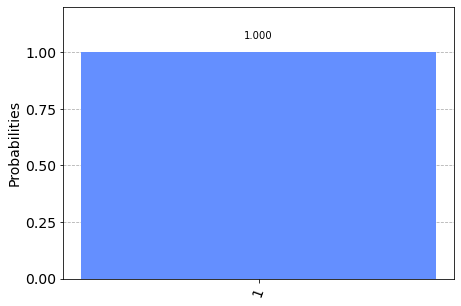

In [3]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Obtenemos la distribución de probabilidad de los estados base
counts = result.get_counts()

# Mostramos el histograma
plot_histogram(counts)

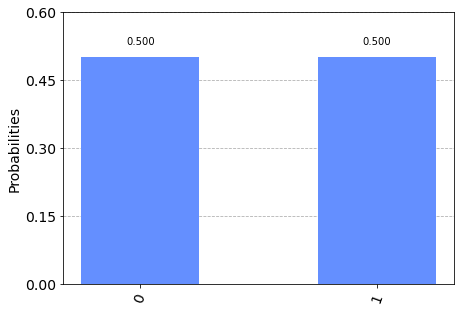

In [4]:
# Definimos una superposición de estados |0> y |1>
from math import sqrt

# Definimos el estado inicial |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefinimos el circuito cuántico
qc =QuantumCircuit(1)

# Inicializamos el estado del qubit 0 en la superposición de estados
qc.initialize(initial_state, 0)

# Ejecutamos el circuito cuántico y obtenemos cuentas
result = execute(qc, backend).result().get_counts()

# Graficamos el histograma
plot_histogram(result)

Qubit con probabilidad de 0.25 de resultado en el estado $|0\rangle$

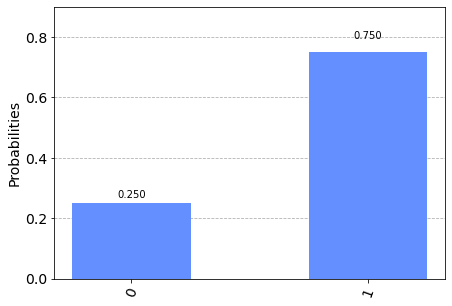

In [5]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

qc = QuantumCircuit(1)
initial_state = [1/2, sqrt(3)/2]
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
counts =result.get_counts()
plot_histogram(counts)

Uso de los ángulos $\theta$ y $\phi$ para preparar el estado inicial, el cual está dado por
$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{-i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle.
$$

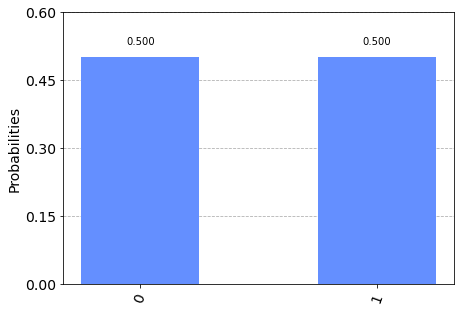

In [6]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import pi, cos, sin, exp
import numpy as np

def get_state(theta, phi):
    """
    Retorna el un vector de estado válido
    """
    return [cos(theta/2.0), np.exp(-1j*phi)*sin(theta/2.0)]

theta = -np.pi/2.0
phi = np.pi

# Creamos, inicializamos, ejecutamos el circuito cuántico
qc = QuantumCircuit(1)
qc.initialize(get_state(theta, phi), 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()

# Mostramos el histograma
plot_histogram(counts)

Un estado sin medir. Nuevamente, el estado está en la superposición 
$$
|\psi\rangle = \frac{1}{2}\left(|0\rangle + |1\rangle \right)
$$

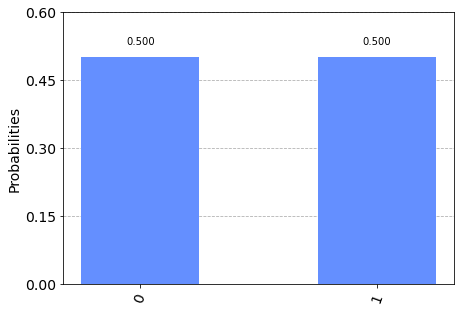

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

# Creamos un circuito cuántico con 1 qubit
qc = QuantumCircuit(1)

# Definimos el estado cuántico |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Aplicamos la operación de inicialización al qubit en la poisición 0
qc.initialize(initial_state, 0)

# Le indicamos a Qiskit como simular el circuito cuántico
backend = Aer.get_backend('statevector_simulator')

# Realizamos la simulación, y retornamos el resultado
result = execute(qc, backend).result()

# Obtenemos los datos y los graficamos en un histograma
counts = result.get_counts()
plot_histogram(counts)


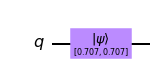

In [8]:
qc.draw('mpl')

Circuito con medida. Recordemos que nuestro sistema tiene como estado inicial 
$$
|\psi\rangle = \frac{1}{2}\left(|0\rangle + |1\rangle \right)
$$

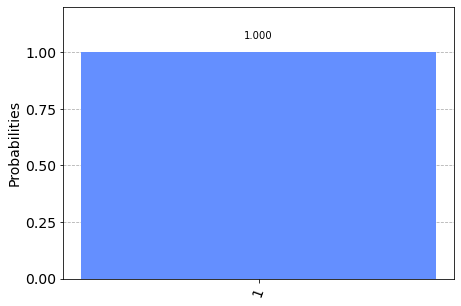

In [9]:
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.measure_all()
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()
plot_histogram(counts)

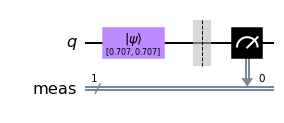

In [10]:
qc.draw('mpl')

# Circuito Cuántico Parametrizado

Se pueden resolver problemas de clasificación binaria usando el circuito cuántico parametrizado

Carga de datos

In [76]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Algunas funciones necesarias para continuar con algunos ejemplos más adelante

In [77]:
import random
random.seed(a=None, version=2)

# Clasificador: da como resultado un número 0 ó 1, independiente de alguna característica 
def classify(passenger):
    return random.randint(0, 1)

# Ejecutador del clasificador
def run(f_classify, x):
    return list(map(f_classify,x))

Limpieza de datos 

In [78]:
# Solo hay dos pasajeros sin este dato. Por lo tanto, los podemos eliminar
train = train.dropna(subset=["Embarked"])

# Tenemos poca información sobre "Cabin". Por lo tanto, podemos eliminar esta columna
train =train.drop("Cabin", axis=1)

mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [79]:
# Removemos algunas columnas que no influyen en la supervivencia de un pasajero
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [80]:
# Manejo de las variables categóricas

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ["Sex", "Embarked"]:
    le.fit(train[col])
    train[col] = le.transform(train[col])
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [81]:
# Normalizamos las características
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

In [82]:
# División de los datos 
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(input_data, labels, test_size=0.2)

In [83]:
# Ejecutamos nuestro clasificador
run(classify, train_input)

# Evaluamos nuestro clasificador con las etiquetas conocidas
def evaluate(predictions, actual):
    correct = list(filter(
    lambda item: item[0] == item[1],
    list(zip(predictions, actual))
    ))
    return "{} correct predictions out of {}. Accuracy {:0f} %".format(
    len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

348 correct predictions out of 711. Accuracy 48.945148 %


Función Reusable para clasificadores hipócritas

In [84]:
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)
    
    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    #cr_specificity = specificity(cr_cm)
    #cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall )
    #cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)
    
    print("The precision score of the {} classifier is {:.2f}".format(name, cr_precision))
    print("The recall score of the {} classifier is {:.2f}".format(name, cr_recall))
    #print("The specificity score of the {} classifier is {:.2f}".format(name, cr_specificity))
    #print("The npv score of the {} classifier is {:.2f}".format(name, cr_npv))
    print(cr_level)
    #print("The information level is {:.2f}".format(name, cr_level))

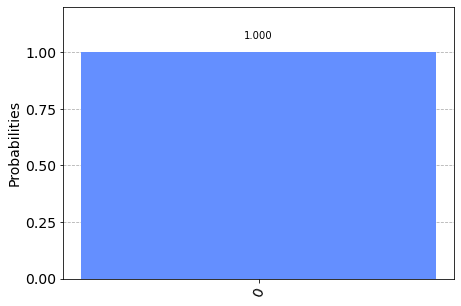

In [85]:
# Hemos creado un circuito cuántico parametrizado que da su predicción binaria (0 ó 1)
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()
result = execute(qc, backend).result()
counts = result.get_counts()
plot_histogram(counts)

El circuito cuántico clasificador parametrizado

In [86]:
# Vamos a construir un circuito cuántico clasificador parametrizado para el ejemplo del
# Titanic

from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
    """
    backend: un backend de Qiskit para ejecutar el circuito cuántico
    passenger_state: un vector de estado cuántico válido
    """
    
    # Creamos un circuito cuántico
    qc = QuantumCircuit(1)
    
    # Definimos el estado |psi> e inicializamos el circuito
    qc.initialize(passenger_state, 0)
    
    # Medimos el qubit
    qc.measure_all()
    
    # Ejecutamos el circuito cuántico
    result = execute(qc, backend).result()
    
    # Obtenemos las cuentas, las cuales pueden ser {'0':1} o {'0':1}
    counts = result.get_counts()
    
    # Obtenemos el bit 0 ó 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

La puntuación del clasificador cuántico aleatorio

In [87]:
# Le decimos a Qiskit como simular el circuito cuántico
backend = Aer.get_backend('statevector_simulator')

# Specificamos el estado cuántico inicial  
initial_state = [1/sqrt(2), 1/sqrt(2)]

###################################
## ESTA SECCIÓN QUEDÓ INCONCLUSA ##
###################################

classifier_report("Random PQC", run, lambda passenger: pqc_classify(backend, initial_state),
                 train_input,
                 train_labels)

The precision score of the Random PQC classifier is 0.38
The recall score of the Random PQC classifier is 0.47
0.2104812834224599


# Algoritmo Cuántico-Clásico Híbrido Variacional

In [ ]:
# Debemos preprocesar nuestros datos de los pasajeros para poder hacer cálculos en un
# computador cuántico.

#####################
# 1. Preprocesamiento
#####################

def pre_process(passenger):
    """
    passenger: datos de los pasajeros normalizados (array de datos numéricos)
    return: estado cuántico válido
    """
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    return quantum_state

########
# 2. PQC
########

def pqc(backend, quantum_state):
    
    # Creamos el circuito cuántico con 1 qubit
    qc = QuantumCircuit(1)
    
    # Definimos el estado |psi> e inicializamos el circuito
    qc.initialize(quantum_state, 0)
    
    # Medimos el qubit
    qc.measure_all()
    
    # Ejecutamos el circuito cuántico
    result = execute(qc, backend).result()
    
    # Obtenemos las cuentas, sea {'0': 1} o {'1': 1}
    counts = result.get_counts(result)
    
    return counts

######################
# 3. Postprocesamiento
######################

def post_process(counts):
    return int(list(map(lambda item: item[0], counts.items()))[0])
